In [1]:
%matplotlib inline
import pandas
import sklearn.linear_model
import matplotlib.pyplot

In [2]:
titanic_temp = pandas.read_csv('titanic.csv', index_col=0)
titanic_temp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
titanic = titanic_temp[titanic_temp.Age.notnull()].copy()
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
lr = sklearn.linear_model.LogisticRegression()
lr.fit(titanic[['Age']] ,titanic.Survived)
predictions = lr.predict([ [age] for age in range(0,101)  ])

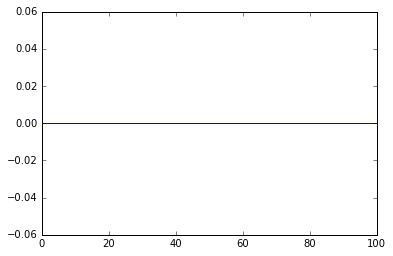

In [5]:
matplotlib.pyplot.plot(predictions)

In [6]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[ 0.51376604,  0.48623396],
       [ 0.51651561,  0.48348439],
       [ 0.51926418,  0.48073582],
       [ 0.52201159,  0.47798841],
       [ 0.52475766,  0.47524234],
       [ 0.52750224,  0.47249776],
       [ 0.53024515,  0.46975485],
       [ 0.53298624,  0.46701376],
       [ 0.53572534,  0.46427466],
       [ 0.53846229,  0.46153771],
       [ 0.54119692,  0.45880308],
       [ 0.54392907,  0.45607093],
       [ 0.54665858,  0.45334142],
       [ 0.54938528,  0.45061472],
       [ 0.55210903,  0.44789097],
       [ 0.55482965,  0.44517035],
       [ 0.55754699,  0.44245301],
       [ 0.56026088,  0.43973912],
       [ 0.56297118,  0.43702882],
       [ 0.56567773,  0.43432227],
       [ 0.56838036,  0.43161964],
       [ 0.57107893,  0.42892107],
       [ 0.57377328,  0.42622672],
       [ 0.57646325,  0.42353675],
       [ 0.5791487 ,  0.4208513 ],
       [ 0.58182948,  0.41817052],
       [ 0.58450543,  0.41549457],
       [ 0.5871764 ,  0.4128236 ],
       [ 0.58984226,

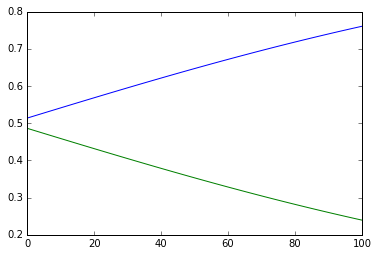

In [7]:
probabilities = lr.predict_proba([ [age] for age in range(0,101)  ])
matplotlib.pyplot.plot(probabilities)
probabilities

In [8]:
import sklearn.cross_validation

In [9]:
sklearn.cross_validation.cross_val_score(lr,
                                         titanic[['Age']],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.59722222,  0.59722222,  0.59722222,  0.59722222,  0.5915493 ,
        0.5915493 ,  0.5915493 ,  0.5915493 ,  0.5915493 ,  0.5915493 ])

In [10]:
import sklearn.dummy
dummy_classifier = sklearn.dummy.DummyClassifier(strategy='most_frequent')
sklearn.cross_validation.cross_val_score(dummy_classifier,
                                         titanic[['Age']],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.59722222,  0.59722222,  0.59722222,  0.59722222,  0.5915493 ,
        0.5915493 ,  0.5915493 ,  0.5915493 ,  0.5915493 ,  0.5915493 ])

In [11]:
titanic.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [12]:
141 + 96

237

In [13]:
141 / 237.0

0.5949367088607594

In [14]:
142.0 / (142 + 97)

0.5941422594142259

In [15]:
424 - 142 - 141

141

In [16]:
290 - 96 - 97

97

In [17]:
141.0 / (141 + 97)

0.592436974789916

Errm, predicting based on age doesn't work.

In [18]:
lr.fit(titanic_temp[['Pclass']], titanic_temp.Survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
lr.predict([  [1], [2], [3]  ])

array([1, 0, 0])

In [20]:
lr.predict_proba([  [1], [2], [3]  ])

array([[ 0.36508232,  0.63491768],
       [ 0.56645721,  0.43354279],
       [ 0.7480416 ,  0.2519584 ]])

Two variables at a time

In [21]:
lr.fit(titanic[['Age', 'Pclass']], titanic.Survived)
lr.predict_proba([ [21,1] , [0,2]   , [25, 3]])

array([[ 0.22838109,  0.77161891],
       [ 0.29931543,  0.70068457],
       [ 0.7559969 ,  0.2440031 ]])

Add in gender

In [22]:
import numpy
titanic['Gender'] = numpy.where(titanic.Sex == 'male',1, 0)

In [23]:
sklearn.cross_validation.cross_val_score(lr,
                                         titanic[['Age', 'Pclass', 'Gender']],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.77777778,  0.73611111,  0.80555556,  0.88888889,  0.74647887,
        0.8028169 ,  0.78873239,  0.73239437,  0.81690141,  0.8028169 ])

In [24]:
sklearn.cross_validation.cross_val_score(dummy_classifier,
                                         titanic[['Age', 'Pclass', 'Gender']],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.59722222,  0.59722222,  0.59722222,  0.59722222,  0.5915493 ,
        0.5915493 ,  0.5915493 ,  0.5915493 ,  0.5915493 ,  0.5915493 ])

In [28]:
lr.fit(titanic[['Age', 'Pclass', 'Gender']], titanic.Survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
lr.coef_

array([[-0.02587543, -1.03634333, -2.27933987]])

In [28]:
lr.intercept_

array([ 4.00542962])

In [29]:
lr.predict_log_proba([ [0, 0, 0]])

array([[-4.02348215, -0.01805253]])

In [30]:
lr.predict_proba([ [0, 0, 0]])

array([[ 0.01789056,  0.98210944]])

In [31]:
import math
math.log(0.98210944)

-0.018052530808805204

In [32]:
lr.predict_proba([ [0, 1, 0]])

array([[ 0.04884215,  0.95115785]])

# Improving the model

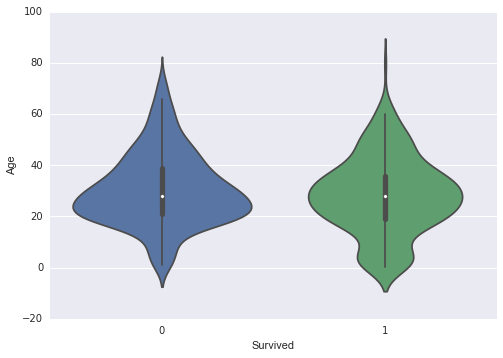

In [33]:
import seaborn
seaborn.violinplot(y='Age', x='Survived',   data=titanic)

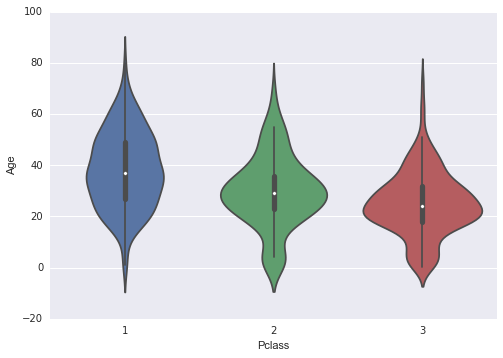

In [34]:
seaborn.violinplot(y='Age', x='Pclass',   data=titanic)

In [35]:
titanic['is_minor'] = numpy.where(titanic.Age < 12,1,0)

In [36]:
sklearn.cross_validation.cross_val_score(lr,
                                         titanic[['Age', 'Pclass', 'Gender', 'is_minor']],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.80555556,  0.76388889,  0.80555556,  0.875     ,  0.76056338,
        0.78873239,  0.77464789,  0.73239437,  0.81690141,  0.8028169 ])

In [37]:
lr.fit(titanic[['Age', 'Pclass', 'Gender', 'is_minor']], titanic.Survived )
lr.coef_

array([[-0.01773969, -1.03148986, -2.29754917,  0.67599113]])

In [38]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,is_minor
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0


In [39]:
columns = ['Age', 'Pclass', 'Gender', 'is_minor', 'Parch', 'SibSp']
sklearn.cross_validation.cross_val_score(lr,
                                         titanic[columns],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.83333333,  0.76388889,  0.80555556,  0.86111111,  0.77464789,
        0.78873239,  0.78873239,  0.74647887,  0.85915493,  0.84507042])

In [40]:
lr.fit(titanic[columns], titanic.Survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
lr.coef_

array([[-0.01819857, -1.02254079, -2.41095398,  1.26874278, -0.08283582,
        -0.39292068]])

In [42]:
def has_brackets(x):
    return '(' in x
titanic['female_married'] = numpy.where(titanic.Name.map(has_brackets),1,0)
titanic[titanic.female_married==1].Name

PassengerId
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
16                      Hewlett, Mrs. (Mary D Kingcome) 
19     Vander Planke, Mrs. Julius (Emelia Maria Vande...
26     Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
41        Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
42     Turpin, Mrs. William John Robert (Dorothy Ann ...
50         Arnold-Franchi, Mrs. Josef (Josefine Franchi)
53              Harper, Mrs. Henry Sleeper (Myna Haxtun)
54     Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...
67                          Nye, Mrs. (Elizabeth Ramell)
86     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
99                  Doling, Mrs. John T (Ada Julia Bone)
133       Robins, Mrs. Alexander A (Grace Charity Laury)
134        Weisz, Mrs. Leopold (Mathilde Francoise Pede)
143    Hakkarainen,

In [43]:
columns = ['Age', 'Pclass', 'Gender', 'is_minor', 'Parch', 'SibSp', 'female_married']
sklearn.cross_validation.cross_val_score(lr,
                                         titanic[columns],
                                         titanic.Survived,
                                         cv=10,
                                         scoring='accuracy')

array([ 0.77777778,  0.79166667,  0.79166667,  0.86111111,  0.78873239,
        0.83098592,  0.83098592,  0.73239437,  0.84507042,  0.84507042])

In [44]:
lr.fit(titanic[columns], titanic.Survived)
lr.coef_

array([[-0.02566257, -1.06003318, -2.02497249,  1.49594979, -0.20988863,
        -0.4259543 ,  1.20600952]])

Evaluating models

In [45]:

columns = ['Age', 'Pclass', 'Gender','Parch', 'SibSp']
(X_train,X_test,y_train,y_test) = sklearn.cross_validation.train_test_split(titanic[columns], titanic.Survived)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(535, 5)
(179, 5)
(535,)
(179,)


In [46]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [47]:
sklearn.metrics.accuracy_score(y_test,predictions)

0.85474860335195535

In [48]:
confusion_dataframe = pandas.DataFrame({
        'predictions': predictions,
        'actuals': y_test
    })
true_positives = ((confusion_dataframe.predictions == confusion_dataframe.actuals)&(confusion_dataframe.predictions == True))
true_negatives = ((confusion_dataframe.predictions == confusion_dataframe.actuals)&(confusion_dataframe.predictions == False)
)
false_negatives = ((confusion_dataframe.actuals == True)&(confusion_dataframe.predictions == False)
)
false_positives = ((confusion_dataframe.actuals == False)&(confusion_dataframe.predictions == True)
)

print "True positives:", true_positives.sum()
print "True negatives: ", true_negatives.sum()
print 'False negatives: ', false_negatives.sum()
print 'False positives: ', false_positives.sum()
confusion_dataframe

True positives: 44
True negatives:  109
False negatives:  19
False positives:  7


,actuals,predictions
PassengerId,,
364,0,0
737,0,0
507,1,1
268,1,0
447,1,1
504,0,0
629,0,0
128,1,0
422,0,0


In [49]:
confusion = sklearn.metrics.confusion_matrix(y_test,predictions)
confusion

array([[109,   7],
       [ 19,  44]])

In [50]:
TN = confusion[0,0]
TN

109

In [51]:
FN = confusion[1,0]
FN

19

In [52]:
TP = confusion[1,1]
TP

44

In [53]:
FP = confusion[0,1]
FP

7

In [54]:
print sklearn.metrics.classification_report(y_test,predictions)

             precision    recall  f1-score   support

          0       0.85      0.94      0.89       116
          1       0.86      0.70      0.77        63

avg / total       0.86      0.85      0.85       179



In [55]:
sklearn.metrics.recall_score(y_test,predictions)

0.69841269841269837

In [56]:
sklearn.metrics.f1_score(y_test,predictions)

0.77192982456140347

In [57]:
sklearn.metrics.precision_score(y_test,predictions)

0.86274509803921573

In [58]:
sklearn.metrics.fbeta_score(y_test,predictions,beta=2.0)

0.72607260726072609

# AUC/ROC

In [59]:
lr.predict_proba(X_test)

array([[ 0.8967666 ,  0.1032334 ],
       [ 0.61428166,  0.38571834],
       [ 0.23936254,  0.76063746],
       [ 0.89389042,  0.10610958],
       [ 0.16463071,  0.83536929],
       [ 0.51758644,  0.48241356],
       [ 0.87391635,  0.12608365],
       [ 0.86828384,  0.13171616],
       [ 0.85943614,  0.14056386],
       [ 0.09553038,  0.90446962],
       [ 0.89389042,  0.10610958],
       [ 0.85009674,  0.14990326],
       [ 0.2845929 ,  0.7154071 ],
       [ 0.86828384,  0.13171616],
       [ 0.39981447,  0.60018553],
       [ 0.89624633,  0.10375367],
       [ 0.88958887,  0.11041113],
       [ 0.66297048,  0.33702952],
       [ 0.4671994 ,  0.5328006 ],
       [ 0.2383431 ,  0.7616569 ],
       [ 0.89852314,  0.10147686],
       [ 0.6617999 ,  0.3382001 ],
       [ 0.908858  ,  0.091142  ],
       [ 0.49850835,  0.50149165],
       [ 0.90940127,  0.09059873],
       [ 0.85943614,  0.14056386],
       [ 0.88958887,  0.11041113],
       [ 0.76369108,  0.23630892],
       [ 0.67046312,

In [60]:
Y_scoring = lr.decision_function(X_test)
Y_scoring

array([-2.16180317, -0.46534616,  1.15617751, -2.13111084,  1.62416904,
       -0.07037481, -1.93603912, -1.88586933, -1.81061465,  2.24790437,
       -2.13111084, -1.73535997,  0.92179199, -1.88586933,  0.40623819,
       -2.15619573, -2.08654849, -0.67655996,  0.1313911 ,  1.16178496,
       -2.18092172, -0.67132552, -2.2997701 ,  0.00596663, -2.30634619,
       -1.81061465, -2.08654849, -1.17302342, -0.71028043,  0.1313911 ,
       -1.26738254, -1.98620891, -1.4680617 ,  0.53166266, -1.98620891,
       -1.10862471, -2.37333831, -2.42652213, -2.36248233, -1.57961616,
       -2.11163339,  0.99403264,  0.32573497, -1.93603912, -0.13140058,
        1.1029937 , -1.79977277, -1.88586933, -1.52944638, -1.91095423,
        1.0779088 ,  2.2785967 , -2.36248233, -0.1138504 , -0.54590105,
       -0.80198443, -2.14926073, -0.80198443, -2.76384065, -0.16402019,
       -0.41185511, -1.26044754,  0.30589861, -2.08654849, -1.28083194,
       -2.01129381, -1.71027507, -1.81061465, -0.57098595,  0.26

In [61]:
fpr,tpr,sorted_decision_function_data = sklearn.metrics.roc_curve(y_test,Y_scoring)

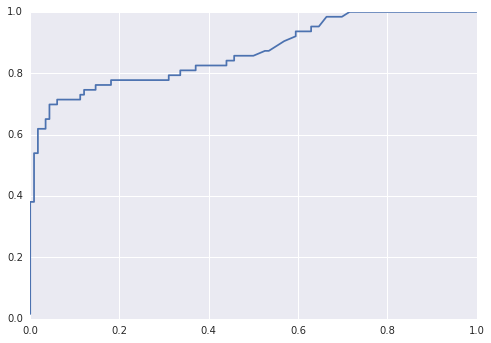

In [62]:
matplotlib.pyplot.plot(fpr,tpr)

In [63]:
sklearn.metrics.auc(fpr,tpr)

0.86754241926655729